### Group 19

source : <br>

https://realpython.com/k-means-clustering-python/<br>
https://www.analyticsvidhya.com/blog/2022/10/handling-missing-data-with-simpleimputer//<br>
https://www.encora.com/insights/a-visual-guide-to-time-series-decomposition-analysis<br>
https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e<br>


---
### Dataset

We are using this dataset [Kuala Lumpur Daily Weather 2019-2023](https://www.kaggle.com/datasets/jylim21/kuala-lumpur-daily-weather-2019-2023) which is accessible at [this link](https://www.kaggle.com/datasets/jylim21/kuala-lumpur-daily-weather-2019-2023).

#### Column Explanation

- **name:** Name of the location (e.g., Kuala Lumpur).

- **datetime:** Date and time of the recorded weather data.

- **tempmax:** Maximum temperature recorded.

- **tempmin:** Minimum temperature recorded.

- **temp:** Current temperature.

- **feelslikemax:** Maximum "feels-like" temperature.

- **feelslikemin:** Minimum "feels-like" temperature.

- **feelslike:** Current "feels-like" temperature.

- **dew:** Dew point temperature.

- **humidity:** Humidity percentage.

- **precip:** Amount of precipitation.

- **precipprob:** Probability of precipitation.

- **precipcover:** Percentage of precipitation coverage.

- **preciptype:** Type of precipitation (e.g., rain, snow).

- **snow:** Amount of snowfall.

- **snowdepth:** Depth of snow.

- **windgust:** Maximum wind gust speed.

- **windspeed:** Current wind speed.

- **winddir:** Wind direction.

- **sealevelpressure:** Atmospheric pressure at sea level.

- **cloudcover:** Percentage of cloud coverage.

- **visibility:** Visibility range.

- **solarradiation:** Solar radiation.

- **solarenergy:** Solar energy.

- **uvindex:** UV index.

- **severerisk:** Severity risk of weather conditions.

- **sunrise:** Time of sunrise.

- **sunset:** Time of sunset.

- **moonphase:** Moon phase.

- **conditions:** Overall weather conditions.

- **description:** Description of the weather.

- **icon:** Icon representing the weather.

- **stations:** Weather stations associated with the data.


--- 
### Import Libraries

Make sure install all the libraries below before run the code. If having problem to generate plotly try to upgrade the nbformat

In [42]:
# if havent install
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn
# !pip install plotly
# !pip install seaborn
# !pip install statsmodels
# !pip install nbformat
# !pip install --upgrade nbformat 


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---
### Read Data

Please change the file_path of your dataset according to the location of your dataset file in your local machine

In [43]:
file_path = 'C:\Machine Learning\project\KL Weather 2019 - 2023.csv' # CHANGE HERE

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the head of the DataFrame in a table format
df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,kuala lumpur,1/1/2019,33.9,24.4,27.8,41.6,24.4,30.4,24.0,81.3,...,16.2,7,NaN,2019-01-01T07:18:16,2019-01-01T19:14:48,0.83,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"48647099999,48650099999,WMSA,WMKK"
1,kuala lumpur,1/2/2019,32.9,23.9,27.5,39.1,23.9,30.5,23.9,81.9,...,17.7,8,NaN,2019-01-02T07:18:43,2019-01-02T19:15:18,0.86,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"48647099999,48650099999,WMSA,WMKK"
2,kuala lumpur,1/3/2019,32.7,25.2,28.4,38.7,25.2,31.3,23.7,76.5,...,16.3,7,NaN,2019-01-03T07:19:10,2019-01-03T19:15:47,0.90,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48647099999,48650099999,WMSA,WMKK"
3,kuala lumpur,1/4/2019,33.0,24.1,28.4,39.0,24.1,31.5,23.3,75.2,...,18.8,7,NaN,2019-01-04T07:19:36,2019-01-04T19:16:16,0.93,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48647099999,48650099999,WMSA,WMKK"
4,kuala lumpur,1/5/2019,33.8,24.1,28.7,40.3,24.1,32.0,23.6,75.5,...,22.3,9,NaN,2019-01-05T07:20:01,2019-01-05T19:16:44,0.97,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48647099999,48650099999,WMSA,WMKK"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,kuala lumpur,12/27/2023,32.7,25.0,27.5,39.0,25.0,30.6,24.8,86.1,...,20.5,9,30.0,2023-12-27T07:15:51,2023-12-27T19:12:15,0.50,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"48647099999,48650099999,WMSA,WMKK"
1822,kuala lumpur,12/28/2023,32.1,25.9,27.6,38.1,25.9,30.3,24.9,85.9,...,19.8,9,30.0,2023-12-28T07:16:20,2023-12-28T19:12:45,0.54,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48647099999,48650099999,WMSA,WMKK"
1823,kuala lumpur,12/29/2023,32.7,25.0,27.1,40.3,25.0,29.1,24.8,87.7,...,20.5,9,30.0,2023-12-29T07:16:49,2023-12-29T19:13:15,0.57,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"48647099999,48650099999,WMSA,WMKK"
1824,kuala lumpur,12/30/2023,31.4,24.8,26.6,39.4,24.8,28.5,24.5,88.8,...,17.1,9,30.0,2023-12-30T07:17:17,2023-12-30T19:13:45,0.60,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"WMSA,WMKK"


### Categorized data
These categorizations can be helpful during the data preprocessing phase, where specific operations or transformations might be applied based on the nature of the features. For example, numerical features might require scaling, imputation of missing values, or other numerical transformations, while categorical features may need encoding, and time features may require conversion to datetime objects for time-series analysis.

In [44]:
# Categorize columns
numeric_features = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
                    'precip', 'precipprob', 'precipcover', 'windgust', 'windspeed',
                    'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk']

categorical_features = ['name', 'datetime', 'preciptype', 'conditions', 'description', 'icon', 'stations']

time_features = ['sunrise', 'sunset', 'moonphase']


In [45]:
print("Numeric Features:")
print(numeric_features)
print(df[numeric_features])

Numeric Features:
['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'windgust', 'windspeed', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk']
      tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike   dew  \
0        33.9     24.4  27.8          41.6          24.4       30.4  24.0   
1        32.9     23.9  27.5          39.1          23.9       30.5  23.9   
2        32.7     25.2  28.4          38.7          25.2       31.3  23.7   
3        33.0     24.1  28.4          39.0          24.1       31.5  23.3   
4        33.8     24.1  28.7          40.3          24.1       32.0  23.6   
...       ...      ...   ...           ...           ...        ...   ...   
1821     32.7     25.0  27.5          39.0          25.0       30.6  24.8   
1822     32.1     25.9  27.6          38.1          25.9       30.3  24.9   
1823     32.7     25.0  

In [46]:
print("Categorical Features:")
print(categorical_features)
print(df[categorical_features])

Categorical Features:
['name', 'datetime', 'preciptype', 'conditions', 'description', 'icon', 'stations']
              name    datetime preciptype              conditions  \
0     kuala lumpur    1/1/2019       rain  Rain, Partially cloudy   
1     kuala lumpur    1/2/2019       rain  Rain, Partially cloudy   
2     kuala lumpur    1/3/2019        NaN        Partially cloudy   
3     kuala lumpur    1/4/2019        NaN        Partially cloudy   
4     kuala lumpur    1/5/2019        NaN        Partially cloudy   
...            ...         ...        ...                     ...   
1821  kuala lumpur  12/27/2023       rain  Rain, Partially cloudy   
1822  kuala lumpur  12/28/2023       rain        Partially cloudy   
1823  kuala lumpur  12/29/2023       rain  Rain, Partially cloudy   
1824  kuala lumpur  12/30/2023       rain  Rain, Partially cloudy   
1825  kuala lumpur  12/31/2023       rain  Rain, Partially cloudy   

                                            description          

In [47]:

print("Time Features:")
print(time_features)
print(df[time_features])

Time Features:
['sunrise', 'sunset', 'moonphase']
                  sunrise               sunset  moonphase
0     2019-01-01T07:18:16  2019-01-01T19:14:48       0.83
1     2019-01-02T07:18:43  2019-01-02T19:15:18       0.86
2     2019-01-03T07:19:10  2019-01-03T19:15:47       0.90
3     2019-01-04T07:19:36  2019-01-04T19:16:16       0.93
4     2019-01-05T07:20:01  2019-01-05T19:16:44       0.97
...                   ...                  ...        ...
1821  2023-12-27T07:15:51  2023-12-27T19:12:15       0.50
1822  2023-12-28T07:16:20  2023-12-28T19:12:45       0.54
1823  2023-12-29T07:16:49  2023-12-29T19:13:15       0.57
1824  2023-12-30T07:17:17  2023-12-30T19:13:45       0.60
1825  2023-12-31T07:17:45  2023-12-31T19:14:15       0.63

[1826 rows x 3 columns]


### Preprocessing - Data Normalization
Data normalization is a preprocessing step that scales the numerical features of a dataset to a standard range, usually with a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the analysis and prevents features with larger scales from dominating the learning process.

In [48]:
from sklearn.preprocessing import StandardScaler

# Check for missing values in the original DataFrame
missing_values = df.isnull().sum()

# Handle missing values for numeric columns (replace with mean or median)
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Extract numeric features for normalization
X = df[numeric_features].values

# Print the shape of X before normalization
print("Shape of X before normalization:", X.shape)

# Apply Standard Scaling (Z-score normalization)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Print the shape, mean, and standard deviation of X_normalized
print("Shape of X_normalized:", X_normalized.shape)
print("Mean of X_normalized:", np.mean(X_normalized))
print("Standard Deviation of X_normalized:", np.std(X_normalized))

# Create feature columns for the normalized data
feature_columns = ['feature' + str(i) for i in range(X_normalized.shape[1])]

# Create a DataFrame with the normalized data and feature columns
X_normalized_df = pd.DataFrame(X_normalized, columns=feature_columns)

# Display the head of the DataFrame after normalization
print(X_normalized_df.head())


Shape of X before normalization: (1826, 20)
Shape of X_normalized: (1826, 20)
Mean of X_normalized: 1.72124697359958e-15
Standard Deviation of X_normalized: 1.0
   feature0  feature1  feature2  feature3  feature4  feature5  feature6  \
0  0.754117 -0.649382 -0.275962  1.089088 -0.538204 -0.304825  0.097290   
1  0.099267 -1.180784 -0.553904  0.125265 -0.868544 -0.258782 -0.017695   
2 -0.031702  0.200862  0.279920 -0.028946 -0.009661  0.109559 -0.247665   
3  0.164752 -0.968223  0.279920  0.086712 -0.736408  0.201645 -0.707605   
4  0.688632 -0.968223  0.557861  0.587900 -0.736408  0.431858 -0.362650   

   feature7  feature8  feature9  feature10  feature11  feature12  feature13  \
0  0.336930  0.803693  0.713506   2.017863   0.000000   1.029877   1.878494   
1  0.443421 -0.070464  0.713506   0.013799   0.000000   0.519710   1.650091   
2 -0.514998 -0.505888 -1.401530  -0.989436   3.385454   4.037177   1.193285   
3 -0.745728 -0.505888 -1.401530  -0.989436   0.000000   2.077062   1.650

--- 
### Implement K-Means Clustering

**Purpose:**
The K-Means clustering is applied to group similar data points based on normalized features. This grouping can help identify patterns or segments within the data.

**Importance:**
Clustering can be useful for understanding inherent structures in the dataset. For instance, it can help identify groups of weather conditions that share similarities, aiding in the categorization of days with similar weather patterns.

**Evaluation:**
The quality of K-Means clustering can be assessed by visually inspecting the clusters on scatter plots (as shown in the code).

**Assessment:**
If distinct clusters are formed, it indicates that the algorithm has successfully identified groups of similar data points. The quality depends on the inherent structure of the data.

**Recommendation:**
Explore and analyze the characteristics of each cluster to gain insights into different weather patterns. This information can be used for targeted decision-making, such as preparing for specific weather conditions or optimizing resource allocation.




In [49]:
from sklearn.cluster import KMeans

# Assuming X_normalized_df is your DataFrame with normalized features

# Apply K-means clustering
num_clusters = 2  # Set the number of clusters
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(X_normalized_df)

# Add the cluster labels to the original DataFrame
df['cluster'] = kmeans_model.labels_

# Display the head of the DataFrame with cluster labels
print(df.head())


           name  datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  kuala lumpur  1/1/2019     33.9     24.4  27.8          41.6          24.4   
1  kuala lumpur  1/2/2019     32.9     23.9  27.5          39.1          23.9   
2  kuala lumpur  1/3/2019     32.7     25.2  28.4          38.7          25.2   
3  kuala lumpur  1/4/2019     33.0     24.1  28.4          39.0          24.1   
4  kuala lumpur  1/5/2019     33.8     24.1  28.7          40.3          24.1   

   feelslike   dew  humidity  ...  uvindex  severerisk              sunrise  \
0       30.4  24.0      81.3  ...        7   37.711512  2019-01-01T07:18:16   
1       30.5  23.9      81.9  ...        8   37.711512  2019-01-02T07:18:43   
2       31.3  23.7      76.5  ...        7   37.711512  2019-01-03T07:19:10   
3       31.5  23.3      75.2  ...        7   37.711512  2019-01-04T07:19:36   
4       32.0  23.6      75.5  ...        9   37.711512  2019-01-05T07:20:01   

                sunset  moonphase     

### Visualize Kmeans

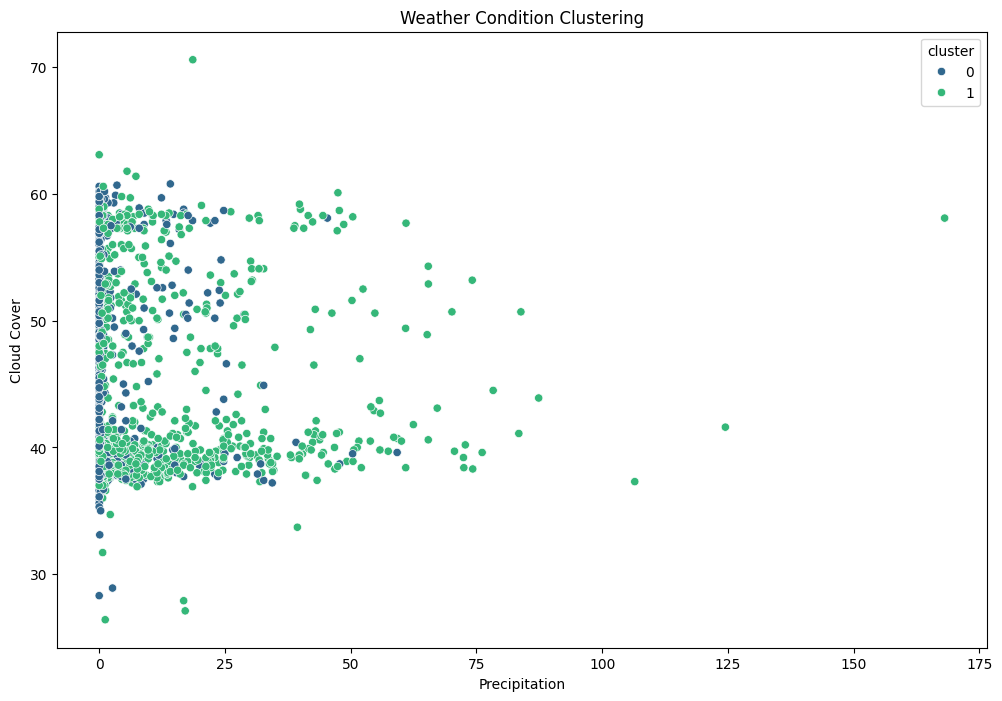

In [50]:
# Visualize the clusters based on precipitation and cloud cover
plt.figure(figsize=(12, 8))
sns.scatterplot(x='precip', y='cloudcover', hue='cluster', data=df, palette='viridis', legend='full')
plt.title('Weather Condition Clustering')
plt.xlabel('Precipitation')
plt.ylabel('Cloud Cover')
plt.show()


### Elbow Method for Optimal Number of Clusters

The elbow method is a technique used to find the optimal number of clusters in a K-Means clustering algorithm. It involves plotting the within-cluster sum of squares (inertia) against the number of clusters and looking for an "elbow" point in the graph.

**Interpretation:**
- If there is a clear and distinct elbow in the graph, it suggests that the optimal number of clusters is at or near that point.
- The elbow point signifies a trade-off between a lower number of clusters (simpler model) and a higher number of clusters (more detailed but potentially overfitting the data).

**Recommendation:**
Based on the elbow point, you can choose the number of clusters that balances model simplicity with capturing meaningful patterns in the data.

**Result**
From the visualization below we can see that K=3 is the Optimal Number of Clusters

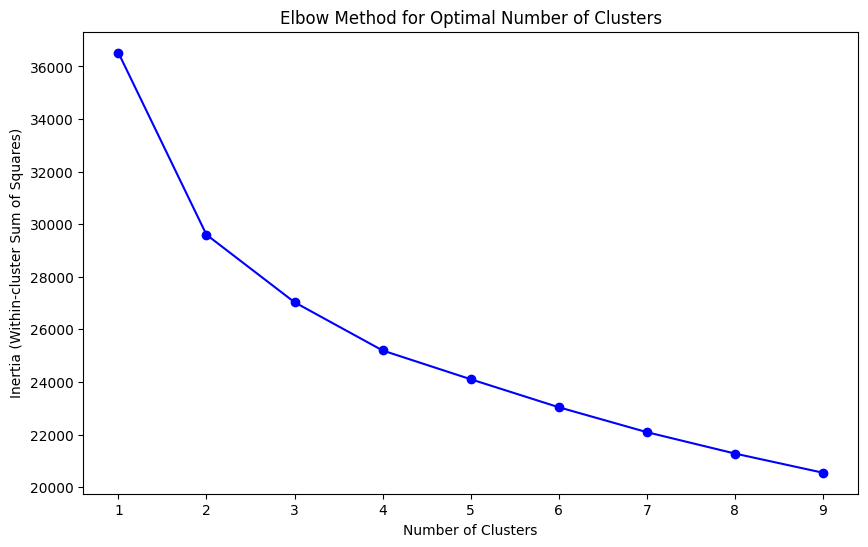

In [51]:
from sklearn.cluster import KMeans

# Find the optimal number of clusters using the elbow method
inertia_values = []
possible_clusters = range(1, 10)  # You can adjust the range based on your preferences

for num_clusters in possible_clusters:
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_model.fit(X_normalized_df)
    inertia_values.append(kmeans_model.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(possible_clusters, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.show()


### Silhouette Analysis for Assessing Cluster Quality

Silhouette analysis is a method used to assess the quality and appropriateness of clusters generated by a K-Means clustering algorithm. The silhouette score measures how well-separated the clusters are, providing insights into the cohesion and separation between data points within the clusters.

**Purpose:**
- Evaluate the quality of clusters produced by the K-Means algorithm.
- Assess how well-defined and distinct the clusters are.
- Validate optimal K in elbow method

**Recommendation:**
- Choose the number of clusters that results in the highest average silhouette score for well-separated and distinct clusters.

Silhouette analysis provides valuable insights into the appropriateness of clustering for a given dataset, helping in the interpretation and utilization of the generated clusters.

**Result**
- From the visualization below we can see that the highest silhouette score is at K =3 which also works to validate the elbow mmethod

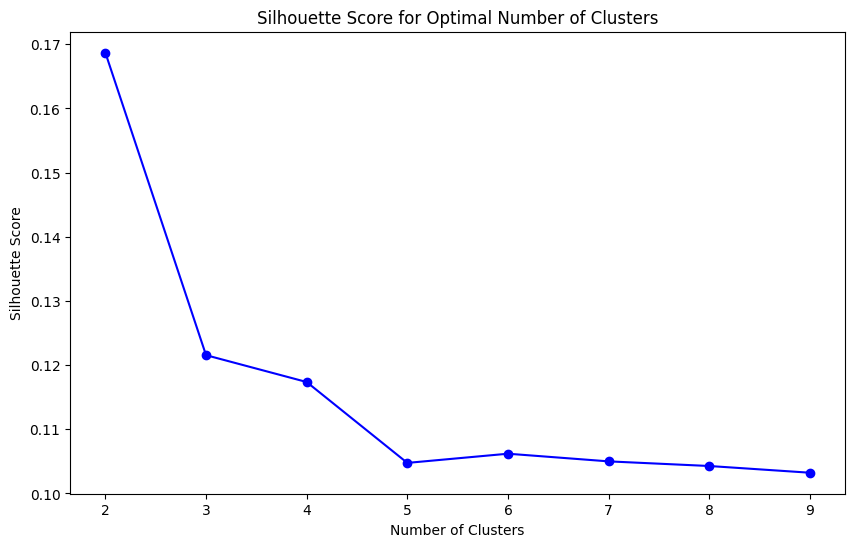

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Find the optimal number of clusters using silhouette score
silhouette_scores = []
possible_clusters = range(2, 10)  # You can adjust the range based on your preferences

for num_clusters in possible_clusters:
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans_model.fit_predict(X_normalized_df)
    silhouette_avg = silhouette_score(X_normalized_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(possible_clusters, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


---

## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is employed to reduce the dimensionality of the dataset, transforming it from a high-dimensional space into a lower-dimensional representation while retaining key information.

**Result:**
   - The dimensionality of the numeric_feature in the dataset is effectively reduced from 20 features to 2 principal components.

**Significance:**
   - Reduction to 2 features enables easier visualization and analysis.
   - The transformed data in `pca_df` can be used for subsequent modeling or visualization tasks.

PCA is a valuable tool when dealing with high-dimensional data, allowing for efficient representation and interpretation of the dataset in a lower-dimensional space.

In [53]:
# Import necessary libraries
from sklearn.decomposition import PCA

# Apply Principal Component Analysis (PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_normalized)

# Create DataFrame for PCA results
pca_df = pd.DataFrame(data=principal_components, columns=["principal component 1", "principal component 2"])

# Print explained variation per principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

# Display the tail of the DataFrame with PCA results
print(pca_df.tail())


Explained variation per principal component: [0.29718715 0.13897237]
      principal component 1  principal component 2
1821               1.228205               0.110803
1822              -0.386721               0.019349
1823               0.926590              -0.259137
1824               5.480237               1.929175
1825               3.012300               1.696486


### Visualization using PCA

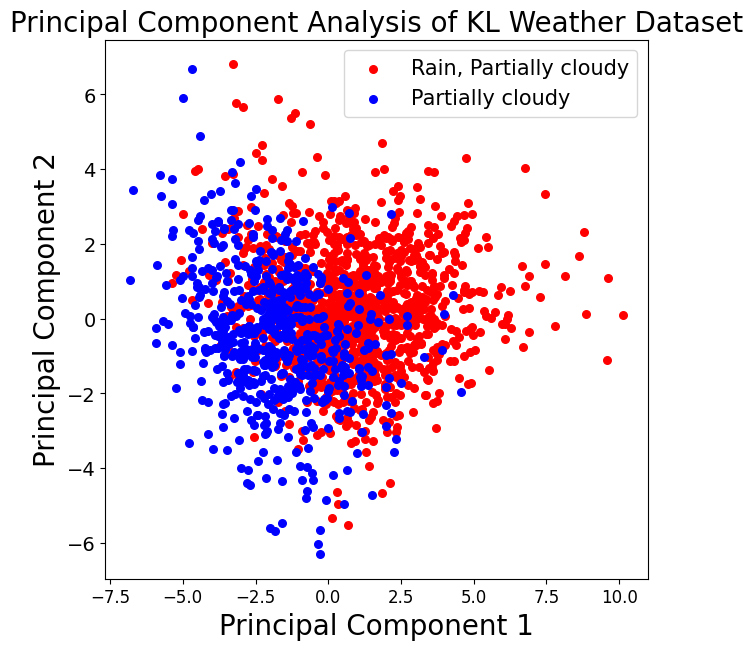

In [54]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(7, 7))

# Set the labels and title
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel("Principal Component 1", fontsize=20)
plt.ylabel("Principal Component 2", fontsize=20)
plt.title("Principal Component Analysis of KL Weather Dataset", fontsize=20)

# Define targets and colors
targets = ['Rain, Partially cloudy', 'Partially cloudy']
colors = ['r', 'b']

# Plot each target separately
for target, color in zip(targets, colors):
    # Filter data based on the condition
    indices_to_keep = df["conditions"] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'principal component 1'],
                pca_df.loc[indices_to_keep, 'principal component 2'],
                c=color, s=30)

# Add legend
plt.legend(targets, prop={'size': 15})

# Show the plot
plt.show()



#### What can we observe from abve graph ?

The PCA plot reveals:

1. Positive correlation: High values in one principal component tend to coincide with high values in the other.
2. Diagonal spread: Supports the positive correlation, indicating a linked increase/decrease in the underlying variables.
3. Upper right clustering: Suggests more frequent occurrences of high rain and partly cloudy conditions together.

----

### Linear Regression

**Objective:**
- Implement a Linear Regression model to predict the 'uvindex' based on the selected numeric features.

**Results and Insights:**
   - The Linear Regression model focuses on predicting the 'uvindex,' a crucial metric for assessing the intensity of ultraviolet (UV) radiation.
   - The Mean Squared Error (MSE) provides a quantitative measure of the model's accuracy in predicting the 'uvindex' on the test set.
   - Coefficients analysis reveals the relative importance of each feature in influencing the predicted 'uvindex.'
   - This analysis aids in understanding the factors contributing to UV index variations, providing valuable insights for weather-related decision-making.

Linear Regression is a widely-used method for predicting a continuous target variable based on a set of features. It assumes a linear relationship between the features and the target variable.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract the target variable
target_variable = 'uvindex'

# Selecting features and target variable
X = df[numeric_features]
y = df[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values if any
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Print the coefficients
coefficients = pd.DataFrame({'Feature': numeric_features, 'Coefficient': model.coef_})
print(coefficients)




Mean Squared Error: 7.841730023006411e-29
             Feature   Coefficient
0            tempmax -1.331364e-15
1            tempmin -2.220446e-16
2               temp -2.628293e-15
3       feelslikemax -1.163039e-15
4       feelslikemin -8.165327e-16
5          feelslike -3.256137e-16
6                dew  3.715158e-16
7           humidity  9.932269e-16
8             precip  3.782880e-16
9         precipprob  5.683619e-16
10       precipcover  9.371808e-16
11          windgust  7.489331e-16
12         windspeed -4.256036e-17
13  sealevelpressure  2.854732e-16
14        cloudcover  3.475100e-16
15        visibility  9.892071e-17
16    solarradiation  7.253697e-15
17       solarenergy -8.271162e-15
18           uvindex  1.842733e+00
19        severerisk -7.147061e-16


#### Visualize the Linear Regression - Actual vs. Predicted UV Index


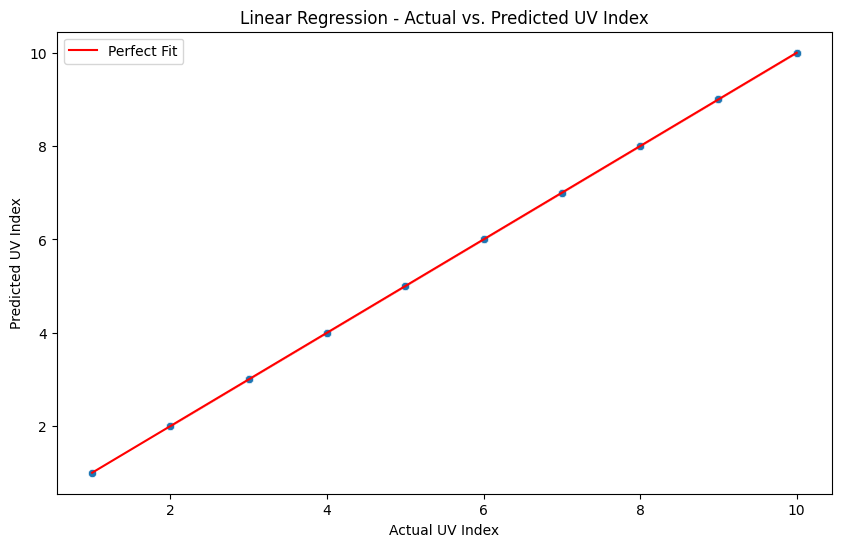

In [56]:
# Visualize the results
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x=y_test, y=predictions)
plt.title('Linear Regression - Actual vs. Predicted UV Index')  # Update title
plt.xlabel('Actual UV Index')  # Update x-axis label
plt.ylabel('Predicted UV Index')  # Update y-axis label

# Plotting the regression line
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit')
plt.legend()

plt.show()


#### What can we observe from the graph above ?
The graph demonstrates:

1. Strong Correlation: Actual and predicted UV index values are closely aligned, indicating a strong correlation.
2. High Accuracy: The linear regression model provides accurate predictions, closely matching actual values.
3. Linear Relationship: The relationship between actual and predicted UV index is linear, suggesting a proportional increase.

In summary, the model shows strong correlation, high accuracy, and a linear relationship.

---
#### 3D linear regression analysis to understand the relationship between temperature ('temp') and selected features ('tempmax', 'tempmin', and 'humidity').

Target Variable:
- The variable to be predicted is 'temp', which represents temperature.

Features Used for Prediction:
- The features selected for the prediction are 'tempmax', 'tempmin', and 'humidity'. These features are used to build a linear regression model that estimates the temperature based on these input variables.


In [63]:
import plotly.graph_objects as go
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming your dataset is loaded as df (DataFrame)

# Selecting features for the 3D linear regression
selected_features = ['tempmax', u'tempmin', 'hmidity']
X = df[selected_features].values
y = df['temp'].values

# Center the data
X_centered = X - X.mean(axis=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Create a meshgrid for the regression plane
xx, yy = np.meshgrid(np.linspace(X_centered[:, 0].min(), X_centered[:, 0].max(), 100),
                     np.linspace(X_centered[:, 1].min(), X_centered[:, 1].max(), 100))

# Evaluate the regression plane at the meshgrid points
zz = model.coef_[0] * xx + model.coef_[1] * yy + model.intercept_

# Create an interactive 3D scatter plot with smaller markers
fig = go.Figure()

# Scatter plot for actual data with smaller markers
fig.add_trace(go.Scatter3d(x=X_test[:, 0], y=X_test[:, 1], z=y_test,
                             mode='markers', marker=dict(size=3, color='blue', symbol='circle'),
                             name='Actual Data', text='Actual Temperature'))

# Scatter plot for predicted data with smaller markers
fig.add_trace(go.Scatter3d(x=X_test[:, 0], y=X_test[:, 1], z=predictions,
                             mode='markers', marker=dict(size=3, color='red', symbol='x'),
                             name='Predicted Data', text='Predicted Temperature'))

# Surface plot for the regression plane with reduced opacity
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, opacity=0.3,
                          colorscale='greens', showscale=False,
                          name='Regression Plane'))

# Set layout for the plot
fig.update_layout(scene=dict(xaxis=dict(title=selected_features[0]),
                             yaxis=dict(title=selected_features[1]),
                             zaxis=dict(title=selected_features[2])),
                  title='Interactive 3D Linear Regression')

# Show the 3D plot
fig.show()

----

### Time Series Visualization of Temperature Over Time

**Objective:**
- Visualize the temporal variations in temperature over the given period.

**Results and Insights:**
   - The time series plot provides a clear visualization of how temperature fluctuates over the specified period.

Time series visualization is essential for detecting patterns, trends, and anomalies in temporal data. It is a valuable tool in weather analysis, enabling the identification of recurring weather patterns and seasonal variations.

In [58]:
df['datetime'] = pd.to_datetime(df['datetime'])

df.set_index('datetime', inplace=True)

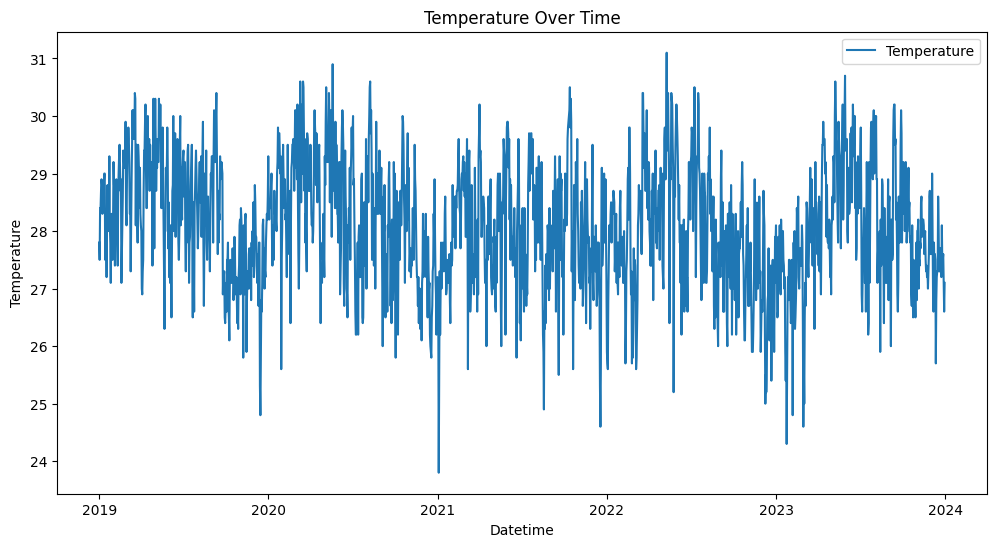

In [59]:

plt.figure(figsize=(12, 6))
plt.plot(df['temp'], label='Temperature')
plt.title('Temperature Over Time')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.legend()
plt.show()


### Time Series Decomposition and Visualization of Temperature Data

**Objective:**
- Decompose the time series of temperature data into its components (trend, seasonal, and residual) to gain insights into underlying patterns.

**Results and Insights:**
   - The decomposition allows us to observe the trend, periodic (seasonal) variations, and residual fluctuations in the temperature time series.
   - Insights into the underlying patterns, recurring cycles, and irregularities in temperature data are gained through the decomposition.

Time series decomposition aids in understanding the inherent structure of temporal data, assisting in identifying patterns and making informed decisions related to weather forecasting and analysis.

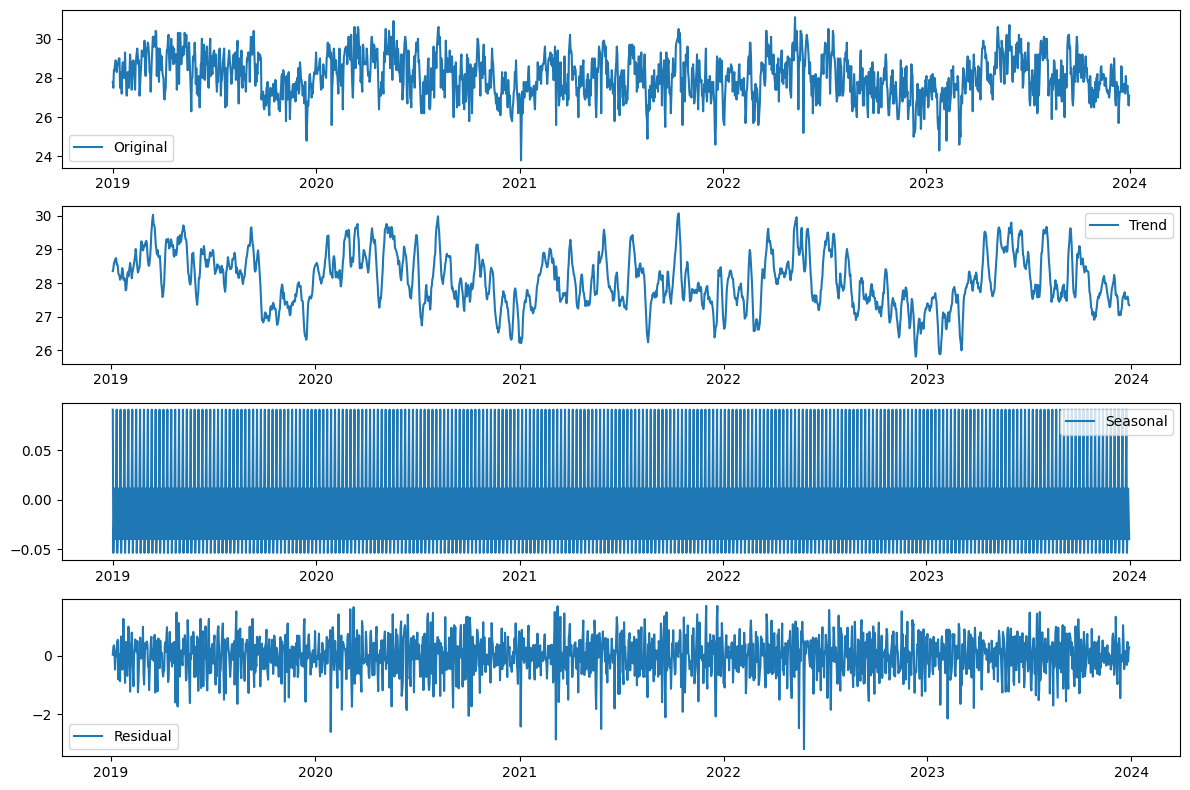

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set your actual seasonality period
seasonal_period = 7  # For example, if you observe a weekly pattern

decomposition = seasonal_decompose(df['temp'], period=seasonal_period)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['temp'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()


### What can we observe ?

1. **Original Temperature:**
   - The subplot labeled "Original" represents the actual temperature time series.
   - This component reflects the overall trend, seasonal variations, and residual fluctuations in the original data.

2. **Trend Component:**
   - The subplot labeled "Trend" displays the long-term pattern or trend in the temperature data.
   - Observing this component helps in identifying whether temperatures are generally rising, falling, or remaining stable over time.

3. **Seasonal Component:**
   - The subplot labeled "Seasonal" illustrates the periodic variations in temperature that occur regularly, in this case, with a weekly pattern (as set by the seasonality period).
   - Understanding the seasonal component is crucial for recognizing recurring cycles, such as temperature variations between weekdays or weekends.

4. **Residual Component:**
   - The subplot labeled "Residual" captures the remaining fluctuations in the temperature data after extracting the trend and seasonal components.
   - Examining the residual component helps identify irregularities or unexpected variations that are not explained by the overall trend or seasonal patterns.


---

### Correlation Heatmap Analysis

The correlation heatmap visually represents the relationships between numerical features in the dataset. Here's an analysis of the heatmap:

1. **Correlation Coefficients:**
   - High positive correlation coefficients (close to 1) indicate a strong positive linear relationship between two features. For example, if one feature increases, the other is likely to increase as well.
   - High negative correlation coefficients (close to -1) suggest a strong negative linear relationship. If one feature increases, the other tends to decrease.
   - Correlation coefficients close to 0 indicate a weaker or no linear relationship between features.

2. **Heatmap Interpretation:**
   - The heatmap uses colors to represent correlation coefficients. Warmer colors (e.g., red) indicate positive correlations, while cooler colors (e.g., blue) represent negative correlations.
   - The intensity of color reflects the strength of the correlation.

3. **Pattern Identification:**
   - Observe patterns of high correlation among certain features. These patterns provide insights into which features tend to vary together.
   - Pay attention to potential multicollinearity, where two or more features are highly correlated. High multicollinearity can impact the interpretability of regression models.

4. **Annotation:**
   - The numbers within each cell of the heatmap represent the actual correlation coefficients between corresponding pairs of features.
   - Positive values are marked in warm colors, and negative values are marked in cool colors.

The correlation heatmap serves as a valuable tool for exploring relationships and patterns within numerical features, contributing to informed decision-making in data analysis.

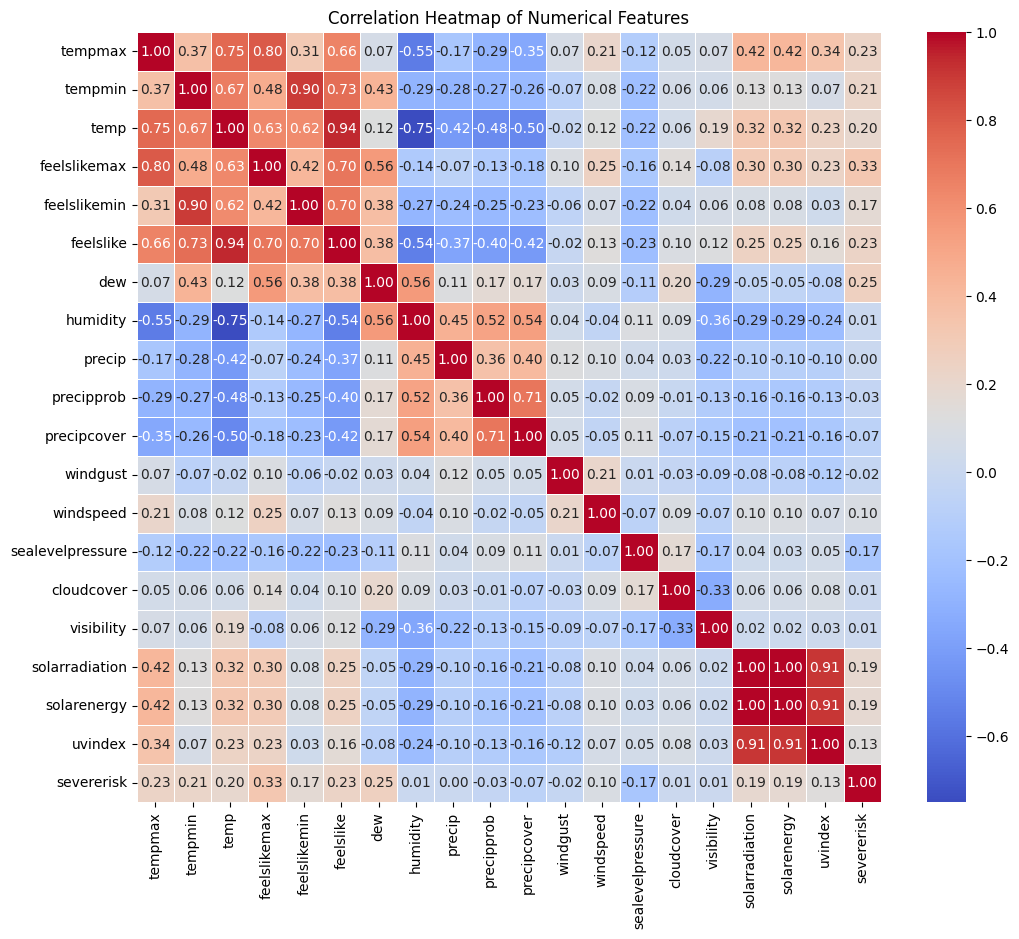

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with numeric features
numeric_df = df[numeric_features]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
